#HW4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
#import matplotlib
#matplotlib.use('Agg')
from matplotlib.table import Table

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 
5. $S_0$ is (0, 3) and $S_T$ is (9,3) 

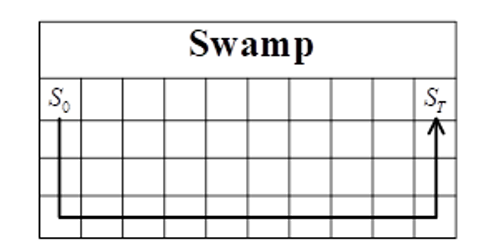

In [2]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]), np.array([0, 1]), np.array([1, 0]), np.array([0, -1])] #x, y

In [3]:
# Maintain state with list datatype.
def step(state, action):
  new_state = (state + action).tolist()
  if new_state[0] < 0 or new_state[0] >= 10 or new_state[1] < 0 or new_state[1] >= 5:
    new_state = state
  if new_state[1] == 4:
    reward = -100
  else:
    reward = -1

  return new_state, reward

In [24]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][4-j])
      if data[i][4-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][4-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][4-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][4-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))
      plt.text(i+0.2,j+0.5,'%.2f' %data[i][4-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][4-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][4-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][4-j][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  plt.savefig("4.png")
  #files.download("4.png") #google.colab only

In [21]:
def Q_learning(epis):
 
  returns = []
      
######## YOUR CODE HERE ########
  epsilon = 0.3
  alpha = 0.1
  gamma = 1
  q_value = rd.rand(10, 5, len(ACTIONS))
  q_value[9][3] = 0
  for z in range(epis):
    #print(z)
    rewards = 0
    state = [0, 3]
    while state != [9, 3]:
      if rd.rand() < epsilon:
        action = rd.randint(0, 4)
      else:
        action = np.argmax(q_value[state[0], state[1]])
      new_state, reward = step(state, ACTIONS[action])
      q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + alpha * (reward + gamma * np.max(q_value[new_state[0], new_state[1]]) - q_value[state[0], state[1], action])
      rewards += reward
      state = new_state

    returns.append(rewards)
####################################
      
  return returns, q_value

In [33]:
def Sarsa(epis):
  
  returns = []
    
######## YOUR CODE HERE ########
  epsilon = 0.3
  alpha = 0.1
  gamma = 1
  q_value = rd.rand(10, 5, len(ACTIONS))
  q_value[9][3] = 0
  for z in range(epis):
    #print(z)
    rewards = 0
    state = [0, 3]
    if rd.rand() < epsilon:
      action = rd.randint(0, 4)
    else:
      action = np.argmax(q_value[state[0], state[1]])
    while state != [9, 3]:
      new_state, reward = step(state, ACTIONS[action])
      if rd.rand() < epsilon:
        new_action = rd.randint(0,4)
      else:
        new_action = np.argmax(q_value[new_state[0], new_state[1]])
      q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + alpha * (reward + gamma * q_value[new_state[0], new_state[1], new_action] - q_value[state[0], state[1], action])
      rewards += reward
      action = new_action
      state = new_state

    returns.append(rewards)
####################################
    
  return returns, q_value

In [11]:
def first_visit_MC_control(epis):
  epsilon = 0.3
  alpha = 0.1
  gamma = 1
  q_value = rd.rand(10, 5, len(ACTIONS))
  q_value[9][3] = 0
  returns = []
  for z in range(epis):
    #until to ST
    tra = []
    state = [0, 3]
    G = 0
    while state != [9, 3]:
      if rd.rand() < epsilon:
        action = rd.randint(0, 4)
      else:
        action = np.argmax(q_value[state[0], state[1]])
      new_state, reward = step(state, ACTIONS[action])
      tra.append([state, action, reward])
      state = new_state
    rewards = 0 
    for i in range(len(tra)-1, -1, -1):
      rewards += tra[i][2]
      iterate = 0
      G = tra[i][2] + gamma * G
      for j in range(i):
        if tra[i][0] == tra[j][0]:
          iterate = 1
          break
      if i == 0 or iterate == 0:
        q_value[tra[i][0][0], tra[i][0][1], tra[i][1]] = q_value[tra[i][0][0], tra[i][0][1], tra[i][1]] + alpha * (G - q_value[tra[i][0][0], tra[i][0][1], tra[i][1]])
    
    returns.append(rewards)

  return returns

In [15]:
def every_visit_MC_control(epis):
  epsilon = 0.3
  alpha = 0.1
  gamma = 1
  q_value = rd.rand(10, 5, len(ACTIONS))
  q_value[9][3] = 0
  returns = []
  for _ in range(epis):
    tra = []
    state = [0, 3]
    while state != [9, 3]:
      if rd.rand() < epsilon:
        action = rd.randint(0, 4)
      else:
        action = np.argmax(q_value[state[0],state[1]])
      new_state, reward = step(state, ACTIONS[action])
      tra.append([state, action, reward])
      state = new_state
    rewards = 0 
    for i in range(0,len(tra)):
      G = 0
      rewards += tra[i][2]
      for j in range(len(tra)-1, i-1, -1):
        G = tra[j][2] + gamma * G
      q_value[tra[i][0][0], tra[i][0][1], tra[i][1]] = q_value[tra[i][0][0], tra[i][0][1], tra[i][1]] + alpha * (G - q_value[tra[i][0][0], tra[i][0][1], tra[i][1]])
    
    returns.append(rewards) 
      
  return returns, q_value

# Result(60%):

Average 30 simulation, 2000 episode per simulation.

In [5]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

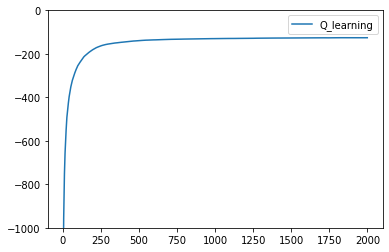

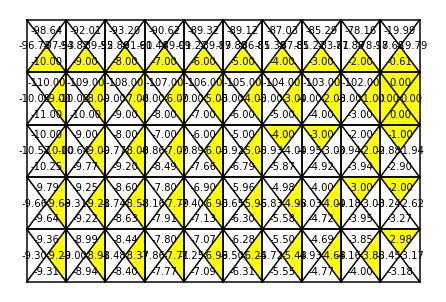

In [25]:
learning_curve = []
q_value = np.zeros([10,5,4])
for i in range(30):
  returns, q_value_ = Q_learning(2000)
  learning_curve.append(averages(returns))
  q_value += q_value_
q_value /= 30

plt.plot(np.average(learning_curve,axis = 0),label = "Q_learning")
plt.ylim(-1000, 0)
plt.legend()
plt.show()
drawTable(q_value)

Q_learning_learning_curve = learning_curve

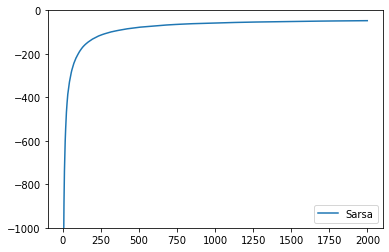

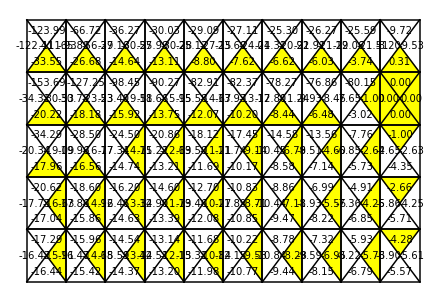

In [34]:
learning_curve = []
q_value = np.zeros([10,5,4])
for i in range(30):
  returns, q_value_ = Sarsa(2000)
  learning_curve.append(averages(returns))
  q_value += q_value_
q_value /= 30

plt.plot(np.average(learning_curve,axis = 0),label = "Sarsa")
plt.ylim(-1000, 0)
plt.legend()
plt.show()
drawTable(q_value)

Sarsa_learning_curve = learning_curve

第1次模擬 done
第2次模擬 done
第3次模擬 done
第4次模擬 done
第5次模擬 done
第6次模擬 done
第7次模擬 done
第8次模擬 done
第9次模擬 done
第10次模擬 done
第11次模擬 done
第12次模擬 done
第13次模擬 done
第14次模擬 done
第15次模擬 done
第16次模擬 done
第17次模擬 done
第18次模擬 done
第19次模擬 done
第20次模擬 done
第21次模擬 done
第22次模擬 done
第23次模擬 done
第24次模擬 done
第25次模擬 done
第26次模擬 done
第27次模擬 done
第28次模擬 done
第29次模擬 done
第30次模擬 done


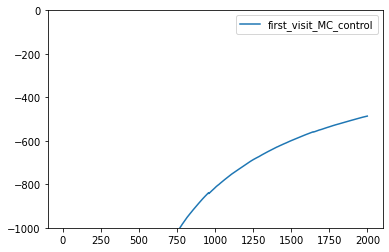

In [14]:
learning_curve = []
for z in range(30): 
  returns = first_visit_MC_control(2000)
  learning_curve.append(averages(returns))
  print('第' + str(z+1) + '次模擬 done')

plt.plot(np.average(learning_curve, axis = 0),label = "first_visit_MC_control")
plt.ylim(-1000, 0)
plt.legend()
plt.show()

first_visit_MC_control_learning_curve = learning_curve

第1次模擬 done
第2次模擬 done
第3次模擬 done
第4次模擬 done
第5次模擬 done
第6次模擬 done
第7次模擬 done
第8次模擬 done
第9次模擬 done
第10次模擬 done
第11次模擬 done
第12次模擬 done
第13次模擬 done
第14次模擬 done
第15次模擬 done
第16次模擬 done
第17次模擬 done
第18次模擬 done
第19次模擬 done
第20次模擬 done
第21次模擬 done
第22次模擬 done
第23次模擬 done
第24次模擬 done
第25次模擬 done
第26次模擬 done
第27次模擬 done
第28次模擬 done
第29次模擬 done
第30次模擬 done


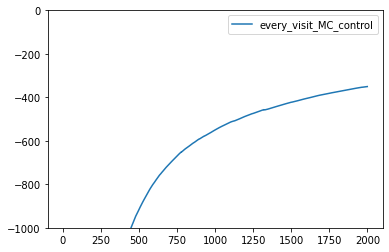

In [20]:
learning_curve = []
for z in range(30): 
  returns, q_value_ = every_visit_MC_control(2000)
  learning_curve.append(averages(returns))
  print('第' + str(z+1) + '次模擬 done')

plt.plot(np.average(learning_curve,axis = 0),label = "every_visit_MC_control")
plt.ylim(-1000, 0)
plt.legend()
plt.show()

every_visit_MC_control_learning_curve = learning_curve

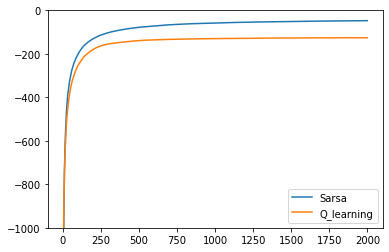

In [36]:
plt.plot(np.average(Sarsa_learning_curve, axis = 0),label = "Sarsa")
plt.plot(np.average(Q_learning_learning_curve, axis = 0),label = "Q_learning")
plt.ylim(-1000,0)
plt.legend()
plt.show()

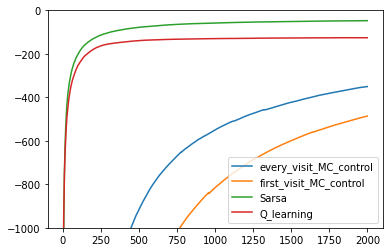

In [35]:
plt.plot(np.average(every_visit_MC_control_learning_curve, axis = 0),label = "every_visit_MC_control")
plt.plot(np.average(first_visit_MC_control_learning_curve, axis = 0),label = "first_visit_MC_control")
plt.plot(np.average(Sarsa_learning_curve, axis = 0),label = "Sarsa")
plt.plot(np.average(Q_learning_learning_curve, axis = 0),label = "Q_learning")
plt.ylim(-1000,0)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the average rewards of Sarsa and Q-learning, and explain your result.(20%)
2. Plot the Q-values of Sarsa and Q-learning, and explain your result.(10%)
2. Complete Monte Carlo, and compare average rewards.(10%) 

